# Manual Implementation:

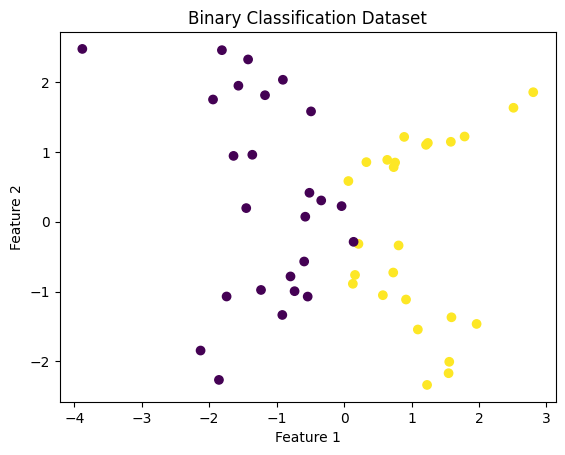

In [1]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np

# Generate a classification dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0, random_state=42)
x1=X[:, 0]
x2=X[:, 1]
# Plot the dataset
plt.scatter(x1, x2, c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()


## Model Training

In [2]:
w1=1
w2=1
b=1
lr=0.05
epoches=100

In [3]:
def perceptron(x1,x2):
    z= b+w1*x1+w2*x2
    return 1 if z>0 else 0

In [4]:
w1

1

In [5]:
for epoch in range(epoches):
    for i in range(len(X)):
        y_pred= perceptron(x1[i],x2[i])

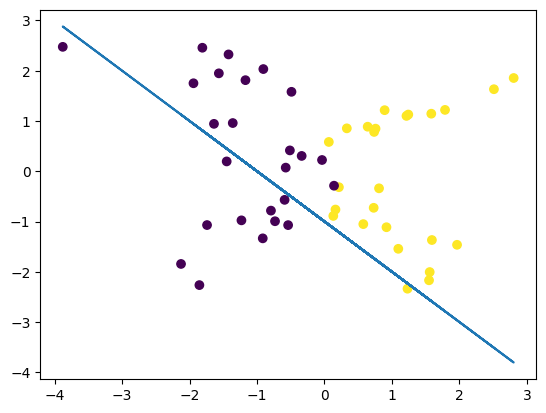

In [6]:
plt.scatter(x1,x2,c=y)
x2_value= -w1/w2*x1-b/w2
plt.plot(x1,x2_value)
plt.show()

In [7]:
for epoch in range(epoches): # iterations
    for i in range(len(X)):  # For all data points present in dataset
        y_pred= perceptron(x1[i],x2[i])
# Update w1,w2,b according to data points
        w1 += lr*(y[i]-y_pred)*x1[i] # w_new= w_old+lr*(y-y_pred)*xi
        w2 += lr*(y[i]-y_pred)*x2[i]
        b += lr*(y[i]-y_pred)

In [8]:
w1

1.285084139732476

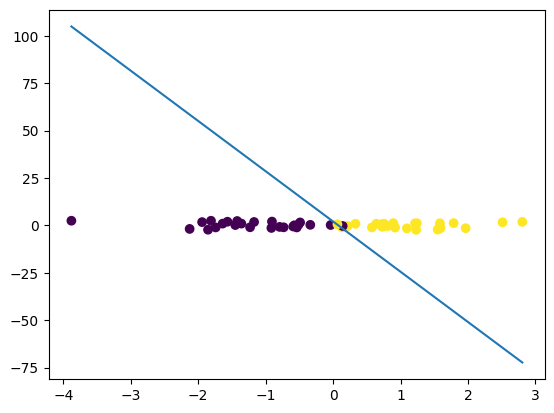

In [9]:
plt.scatter(x1,x2,c=y)
x1_value= np.linspace(min(x1),max(x1),10)
x2_value= -w1/w2*x1_value-b/w2
plt.plot(x1_value,x2_value)
plt.show()

## Model Testing

In [10]:
X,y= make_classification(n_samples=20,n_features=2,n_informative=2,n_redundant=0)
X_test= X
y_test= y

In [11]:
def test_perceptron (x1,x2):
    z= b+w1*x1+w2*x2
    return 1 if z>0 else 0

In [12]:
w1

1.285084139732476

In [13]:
y_prediction= []
for i in range(len(X_test)):
    y_pred= test_perceptron(X_test[i,0],X_test[i,1])
    print(f'sample:{i+1}',f'Actual y: {y_test[i]}',f'Predicted y:{y_pred}')
    y_prediction.append(y_pred)
print("All predictions:", y_prediction)    


sample:1 Actual y: 0 Predicted y:0
sample:2 Actual y: 1 Predicted y:1
sample:3 Actual y: 1 Predicted y:1
sample:4 Actual y: 0 Predicted y:0
sample:5 Actual y: 1 Predicted y:0
sample:6 Actual y: 1 Predicted y:1
sample:7 Actual y: 1 Predicted y:1
sample:8 Actual y: 0 Predicted y:0
sample:9 Actual y: 0 Predicted y:0
sample:10 Actual y: 1 Predicted y:1
sample:11 Actual y: 0 Predicted y:0
sample:12 Actual y: 1 Predicted y:1
sample:13 Actual y: 0 Predicted y:0
sample:14 Actual y: 0 Predicted y:1
sample:15 Actual y: 1 Predicted y:0
sample:16 Actual y: 0 Predicted y:0
sample:17 Actual y: 0 Predicted y:0
sample:18 Actual y: 0 Predicted y:0
sample:19 Actual y: 1 Predicted y:1
sample:20 Actual y: 1 Predicted y:1
All predictions: [0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]


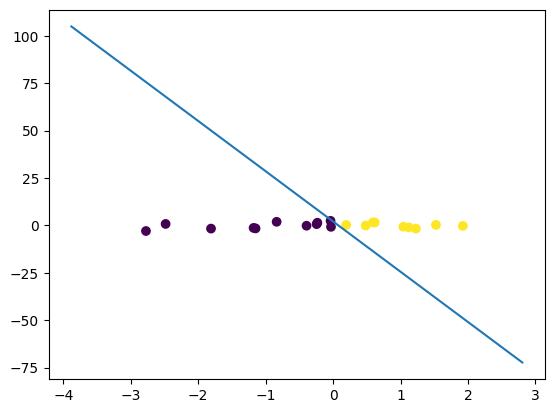

In [14]:
plt.scatter(X_test[:,0],X_test[:,1],c= y_prediction)
x1_value= np.linspace(min(x1),max(x1),10)
x2_value= -w1/w2*x1_value-b/w2
plt.plot(x1_value,x2_value)
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
score= accuracy_score(y_test,y_prediction)
score

0.85

In [16]:
y_prediction= np.array(y_prediction)
y_prediction

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1])

In [17]:
y_test

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1])

In [18]:
"""
    Perceptron Loss Function:
    
    Parameters:
    - y_true: true labels (1 or 0)
    - y_pred: predicted labels (1 or 0)
    
    Formula:
    loss = max(0, y_true * (1 - y_pred) + (1 - y_true) * y_pred)
    

    Explanation:
    - If y_true and y_pred are the same (both 1 or both 0), the loss is zero.
    - If y_true is 1 and y_pred is 0, or vice versa, the loss is 1.
    - The loss increases linearly as the prediction deviates from the true label.
    
    Returns:
    - Average loss over all samples
"""

def perceptron_loss(y_true, y_pred):
    loss = np.maximum(0, y_true * (1 - y_pred) + (1 - y_true) * y_pred)
    return np.mean(loss)

# Assuming y_test and y_predictions are defined
y_test = np.array(y_test)
y_predictions = np.array(y_prediction)  # Replace with your actual predicted labels after applying the step function

# Calculate perceptron loss
loss = perceptron_loss(y_test, y_prediction)

print(f"Perceptron Loss: {loss:.4f}")



Perceptron Loss: 0.1500


# Auto Implementation:

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a binary classification dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


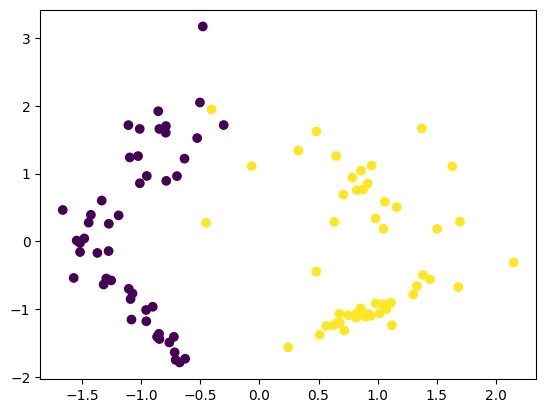

In [20]:
plt.scatter(X[:,0],X[:,1],c=y)

## By Using Sklearn

In [21]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Create a Perceptron model
perceptron_model = Perceptron(max_iter=2000, random_state=42)

# Train the model
perceptron_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron_model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Scikit-learn Perceptron Accuracy: {accuracy}")


Scikit-learn Perceptron Accuracy: 0.95


## By Using Tensorflow

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model= Sequential([Dense(16,activation='relu',input_shape= (2,)),
                   Dense(8,activation='relu'),
                   Dense(4,activation='relu'),
                   Dense(1,activation='sigmoid')])

In [24]:
model.compile(optimizer='nadam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=500,verbose=1)

Epoch 1/500
3/3 [==============================] - 2s 5ms/step - loss: 0.6908 - accuracy: 0.4500
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6843 - accuracy: 0.4875
Epoch 3/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5125
Epoch 4/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6720 - accuracy: 0.5500
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 0.6652 - accuracy: 0.5875
Epoch 6/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6587 - accuracy: 0.5875
Epoch 7/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6522 - accuracy: 0.6000
Epoch 8/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6458 - accuracy: 0.6000
Epoch 9/500
3/3 [==============================] - 0s 2ms/step - loss: 0.6396 - accuracy: 0.6000
Epoch 10/500
3/3 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6000
Epoch 11/500
3/3 [===========

In [26]:
loss,accuracy= model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 197ms/step - loss: 0.0981 - accuracy: 0.9500


9600/9600 [==============================] - 8s 851us/step


<Axes: >

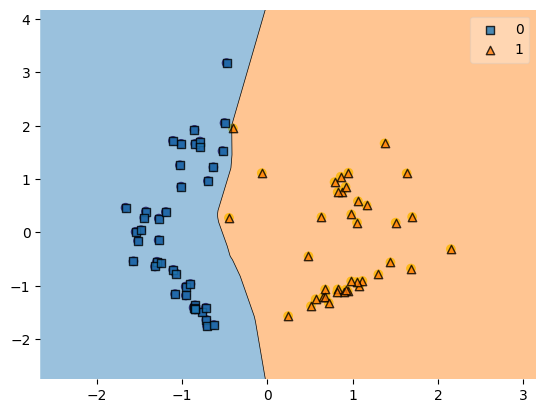

In [27]:
from mlxtend.plotting import plot_decision_regions
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)
plot_decision_regions(X_train,y_train,clf=model)

9600/9600 [==============================] - 9s 931us/step


<Axes: >

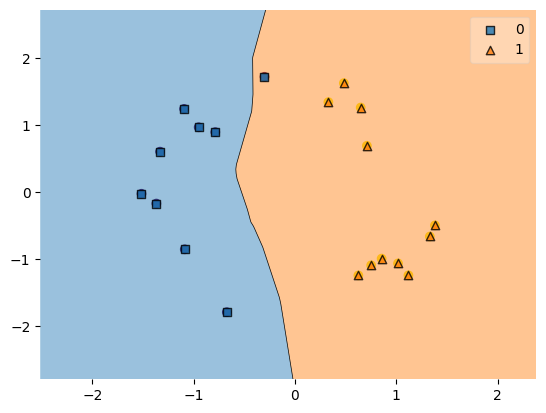

In [28]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test)
plot_decision_regions(X_test,y_test,clf=model)